In [79]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
    
#runALU.ITER9000.PARALLEL1.ROUND1

NROUND=3
NPARALLEL=88


#NROUND=1
#NPARALLEL=1
df_dict = {
    'round': [], 
    'parallel': [], 
    'iter': [], 
    'kepler_container_bpf_block_irq_total': [], 
    'kepler_container_bpf_cpu_time_ms_total': [], 
    'kepler_container_bpf_net_rx_irq_total': [], 
    'kepler_container_bpf_net_tx_irq_total': [], 
    'kepler_container_bpf_page_cache_hit_total': [], 
    'kepler_container_cache_miss_total': [], 
    'dynamic_kepler_container_core_joules_total': [], 
    'idle_kepler_container_core_joules_total': [], 
    'kepler_container_cpu_cycles_total': [], 
    'kepler_container_cpu_instructions_total': [], 
    'dynamic_kepler_container_dram_joules_total': [], 
    'idle_kepler_container_dram_joules_total': [], 
    'dynamic_kepler_container_gpu_joules_total': [], 
    'idle_kepler_container_gpu_joules_total': [], 
    'dynamic_kepler_container_joules_total': [], 
    'idle_kepler_container_joules_total': [], 
    'dynamic_kepler_container_other_joules_total': [], 
    'idle_kepler_container_other_joules_total': [], 
    'dynamic_kepler_container_package_joules_total': [], 
    'idle_kepler_container_package_joules_total': [], 
    'dynamic_kepler_container_platform_joules_total': [], 
    'idle_kepler_container_platform_joules_total': [], 
    'kepler_container_task_clock_ms_total': [], 
    'dynamic_kepler_container_uncore_joules_total': [], 
    'idle_kepler_container_uncore_joules_total': []

}

metrics_list = [
    "kepler_container_joules_total",
    "kepler_node_dram_joules_total",
    "kepler_node_package_joules_total",
    "kepler_node_platform_joules_total",
    "kepler_node_other_joules_total",
    "kepler_container_bpf_cpu_time_us_total"
]

def reset():
    for key in df_dict:
        df_dict[key] = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
reset()

for round in range(0, NROUND):
    for para in range(1, NPARALLEL+1):
        fs = f"../results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.START"
        fe = f"../results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.END"
        df_dict['round'].append(round)
        df_dict['parallel'].append(para)
        df_dict['iter'].append(9000)
        
        with open(fe) as f:
            lines = f.readlines()
        for line in lines:
            if line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"].append(val)
                elif "idle" in line:
                    df_dict[f"idle_{name}"].append(val)
                else:
                    df_dict[name].append(val)
        with open(fs) as f:
            lines = f.readlines()
        for line in lines:
            if line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"][-1] = df_dict[f"dynamic_{name}"][-1] - val
                elif "idle" in line:
                    df_dict[f"idle_{name}"][-1] = df_dict[f"idle_{name}"][-1] - val
                else:
                    df_dict[name][-1] = df_dict[name][-1] - val
                


In [101]:
#print(df_dict)
df = pd.DataFrame(df_dict)
dfnonzero = df.loc[:, (df != 0.0).any(axis=0)]

dfround0 = dfnonzero[dfnonzero['round'] ==0]


round
parallel
iter
kepler_container_bpf_net_rx_irq_total
kepler_container_cache_miss_total
kepler_container_cpu_cycles_total
kepler_container_cpu_instructions_total
dynamic_kepler_container_dram_joules_total
idle_kepler_container_dram_joules_total
dynamic_kepler_container_joules_total
idle_kepler_container_joules_total
dynamic_kepler_container_package_joules_total
idle_kepler_container_package_joules_total
idle_kepler_container_platform_joules_total
kepler_container_task_clock_ms_total


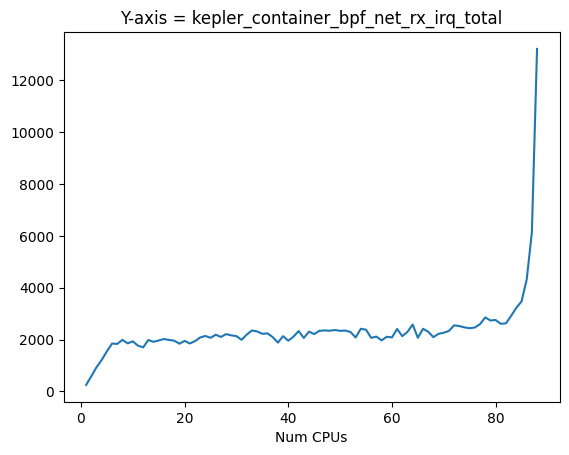

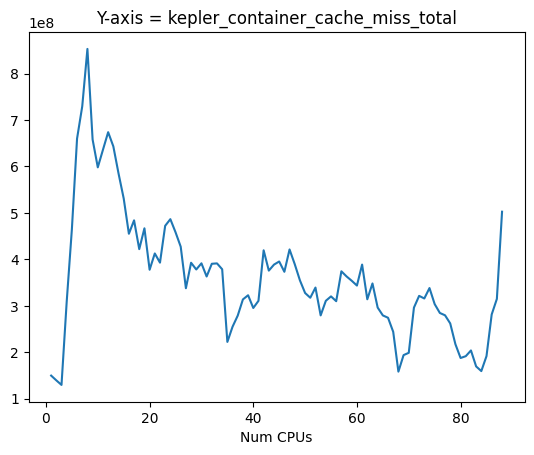

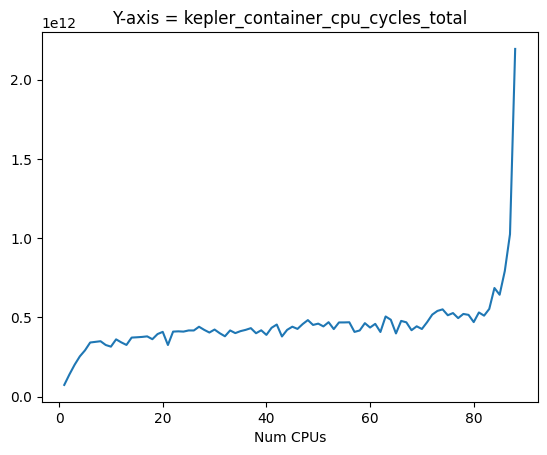

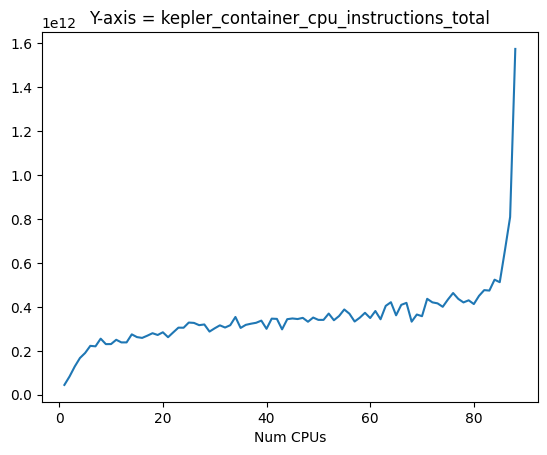

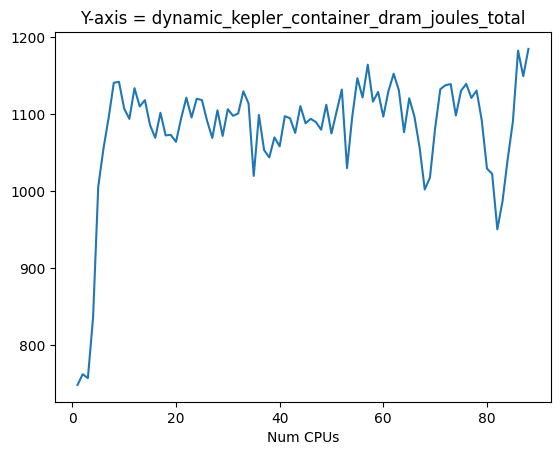

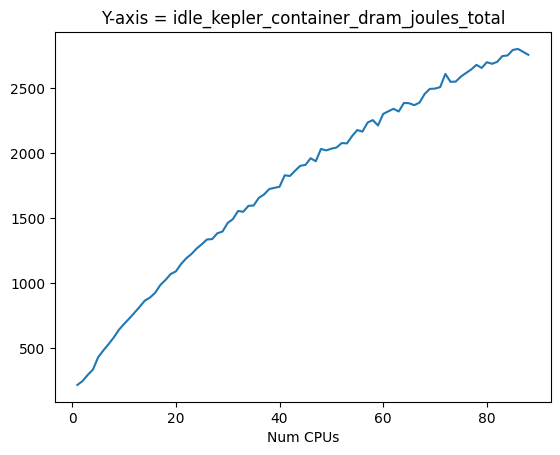

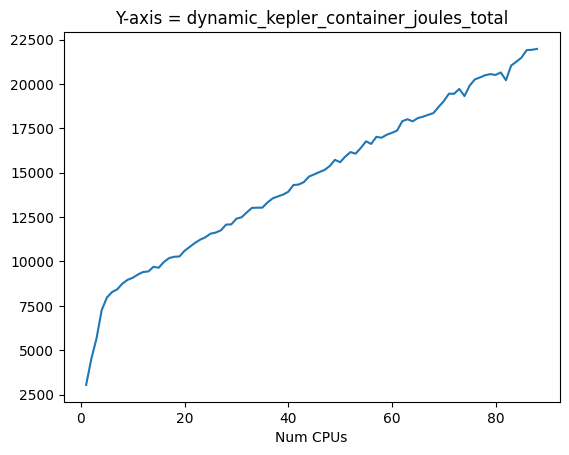

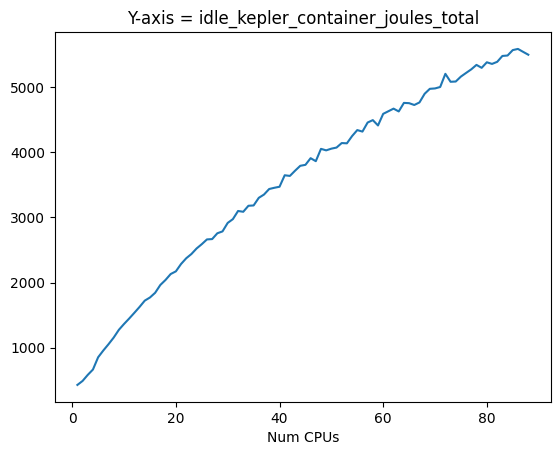

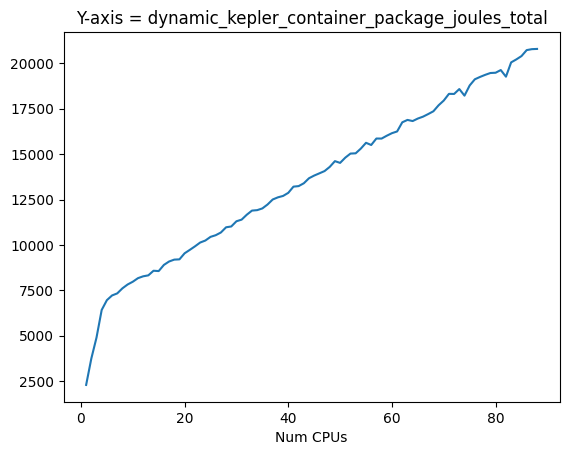

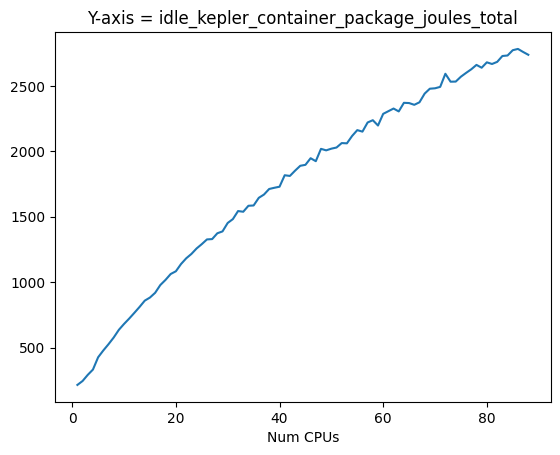

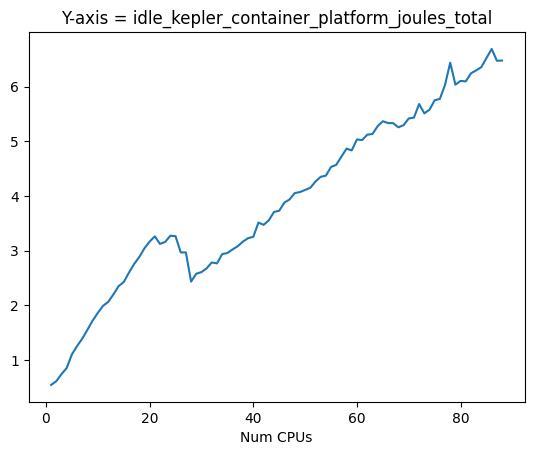

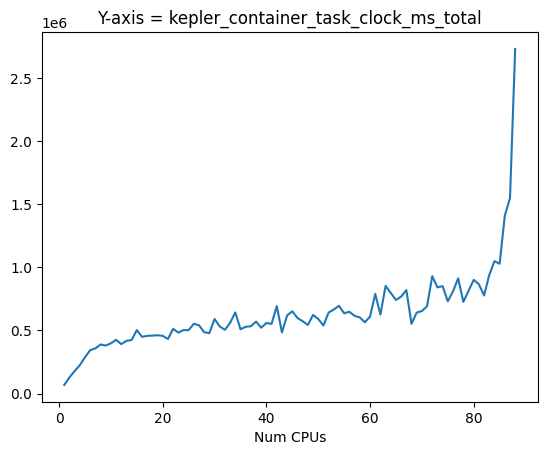

In [105]:
for col in dfround0.columns:
    if 'kepler' in col:
        plt.plot(dfround0['parallel'], dfround0[col])
        plt.title(f"Y-axis = {col}")
        plt.xlabel('Num CPUs')
        #plt.ylabel('Y-axis')
        plt.show()    


In [106]:
dfround1 = dfnonzero[dfnonzero['round'] ==1]

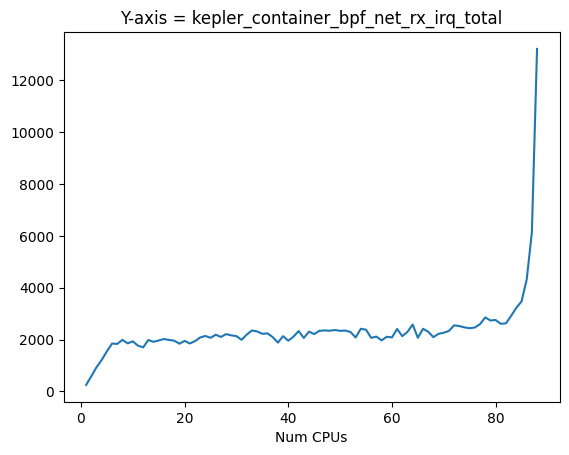

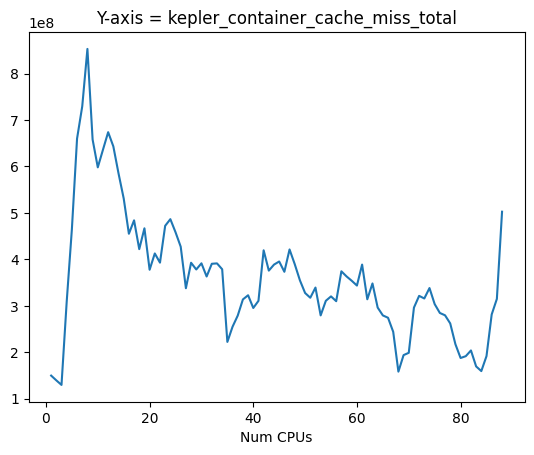

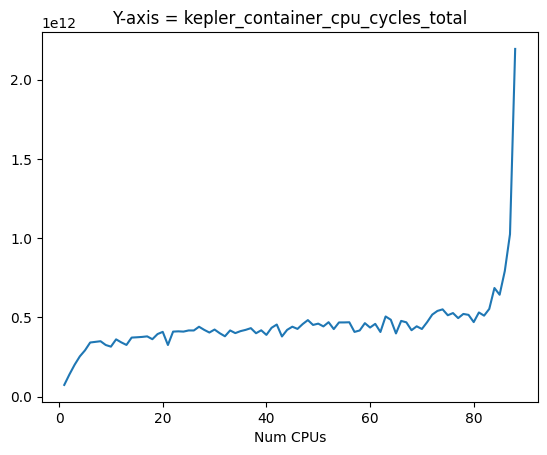

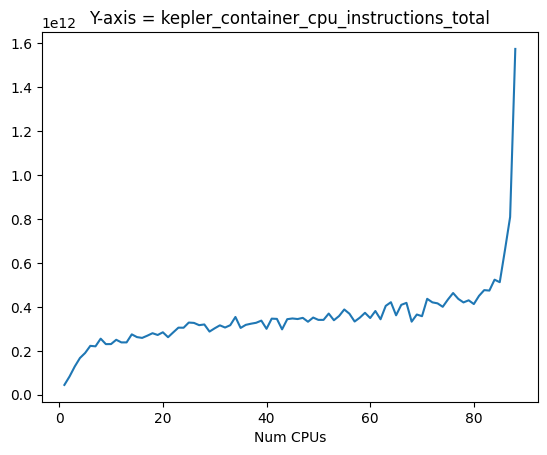

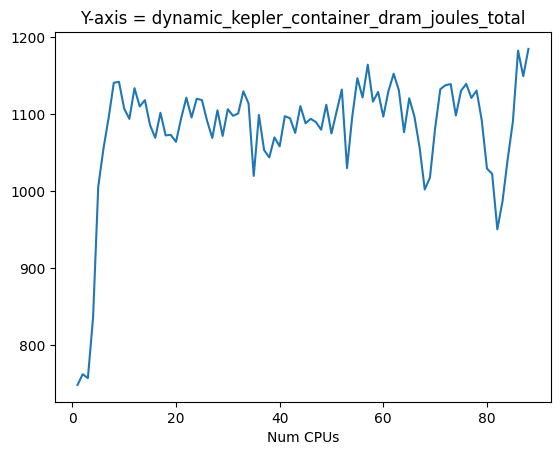

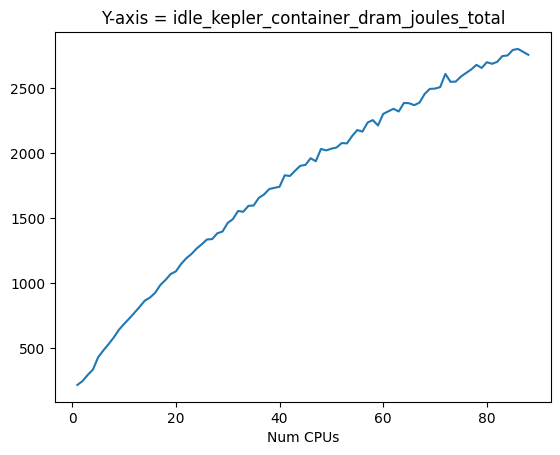

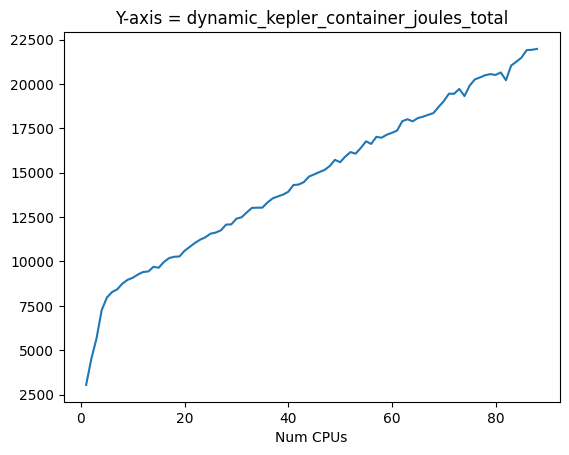

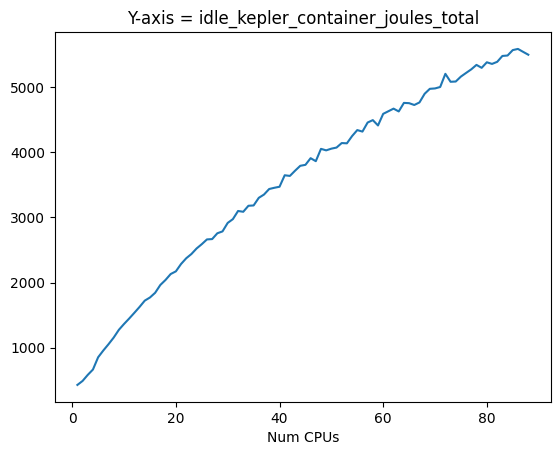

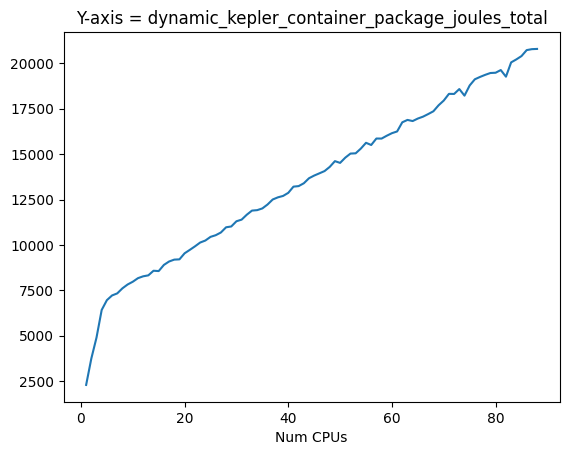

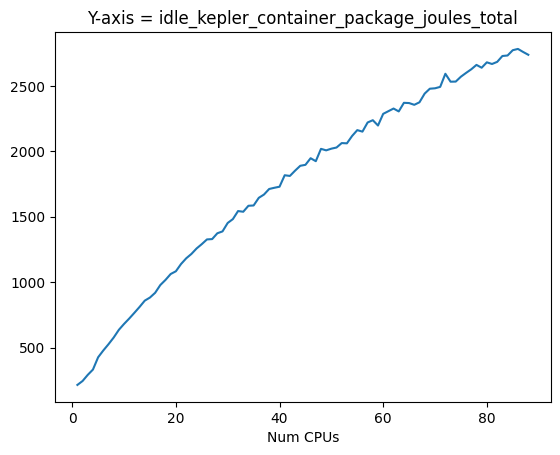

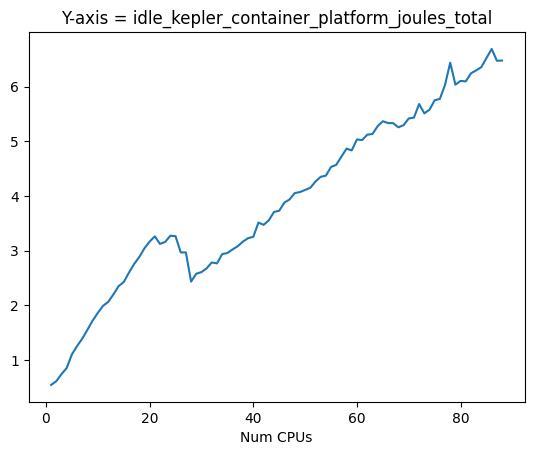

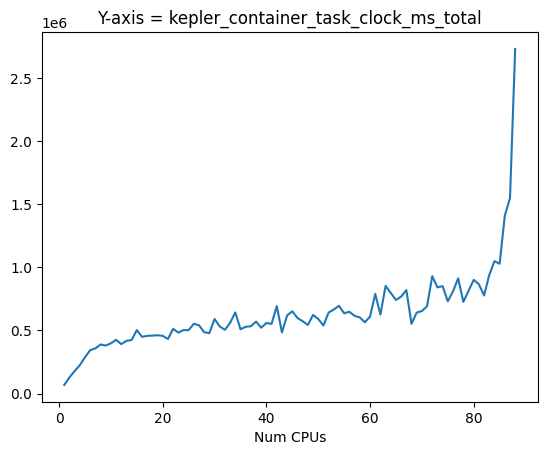

In [107]:
for col in dfround1.columns:
    if 'kepler' in col:
        plt.plot(dfround1['parallel'], dfround0[col])
        plt.title(f"Y-axis = {col}")
        plt.xlabel('Num CPUs')
        #plt.ylabel('Y-axis')
        plt.show()    
